<a href="https://colab.research.google.com/github/ratel0307/Deep-Learning/blob/main/3%EC%9E%A5_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.1 퍼셉트론에서 신경망으로

## 3.2 활성화 함수

In [ ]:
# 3.2.1 시그모이드 함수

# 3.2.2 계단 함수 구현하기

def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

In [ ]:
import numpy as np

#넘파이 배열이 x에 대입될 수 있도록 만듦!
def step_function(x):
  y = x > 0 # 불타입으로 y가 나옴
  return y.astype(np.int) #True -> 1, False -> 0으로 바꿔줌

In [ ]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [ ]:
y = x > 0
y

array([False,  True,  True])

In [ ]:
y.astype(int) #책에서 쓴 np.int는 이제 작동 안 함! 그냥 int로 적기

array([0, 1, 1])

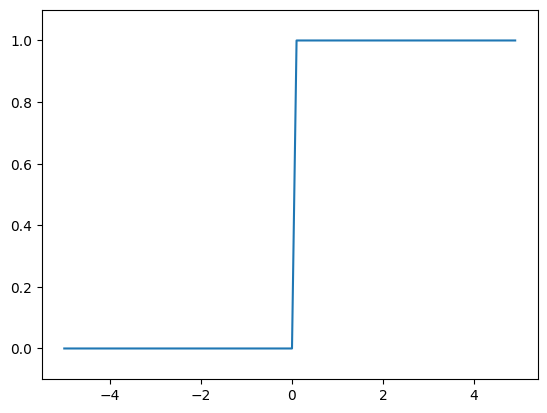

In [ ]:
# 3.2.3 계단 함수의 그래프

import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype=int) #마찬가지로!

X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # y축의 범위 지정
plt.show()

In [ ]:
# 3.2.4 시그모이드 함수 구현하기

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [ ]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [ ]:
1.0 / t

array([1.        , 0.5       , 0.33333333])

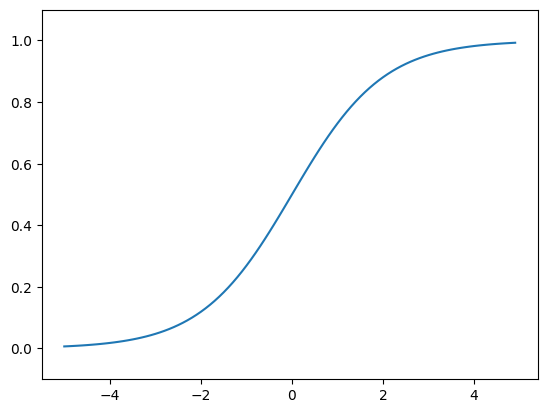

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
# 3.2.5 시그모이드 함수와 계단 함수 비교

# 3.2.6 비선형 함수

# 3.2.7 ReLU 함수

def relu(x):
  return np.maximum(0, x)

## 3.3 다차원 배열의 계산

In [ ]:
# 3.3.1 다차원 배열

# 1차원 배열

import numpy as np
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [ ]:
# 2차원 배열

B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [ ]:
# 3.3.2 행렬의 곱

A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
np.dot(A, B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [ ]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)
np.dot(A, B)

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

In [ ]:
C = np.array([[1, 2], [3, 4]])
print(C.shape)
print(A.shape)
np.dot(A, C)

(2, 2)
(2, 3)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [ ]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A.shape)
B = np.array([7, 8])
print(B.shape)
np.dot(A, B) #1차원 벡터면 계산에 따라 행 벡터 또는 열 벡터로 유연하게 변환된다

(3, 2)
(2,)


array([23, 53, 83])

In [ ]:
# 3.3.3 신경망에서의 행렬 곱

X = np.array([1, 2])
print(X.shape)
W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3.4 3층 신경망 구현하기

In [ ]:
# 3.4.2 각 층의 신호 전달 구현하기

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print(A1)
print(Z1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [ ]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [ ]:
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

In [ ]:
# 3.4.3 구현 정리

def init_network(): #가중치와 편향을 초기화하고 이들을 딕셔너리 변수인 network에 저장
  network = {} #각 층에 필요한 매개변수를 저장
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기

In [ ]:
# 3.5.1 항등 함수와 소프트맥스 함수 구현하기

import numpy as np
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [ ]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [ ]:
# 3.5.2 소프트맥스 함수 구현 시 주의점

a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

<ipython-input-5-316dbb28ed63>:4: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
<ipython-input-5-316dbb28ed63>:4: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([nan, nan, nan])

In [ ]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [ ]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [ ]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

In [ ]:
# 3.5.3 소프트맥스 함수의 특징

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

In [ ]:
# 3.5.4 출력층의 뉴런 수 정하기

## 3.6 손글씨 숫자 인식

In [ ]:
# 3.6.1 MNIST 데이터셋

#MNIST 데이터 가져오기 -> 코랩으로 하면 책과 다르니 꼭 참고하시길 바랍니다!
#제 구글드라이브와 동일하게 dataset 폴더를 생성하고 mnist.py와 4개의 .gz 파일을 다운 받으면 됩니다. 모르는 거 있으면 카톡방에 언제든지 물어보세요!

import sys, os
sys.path.append('/content/drive/MyDrive/deep-learning-from-scratch/dataset') #구글 드라이브와 연결합니다.
from mnist import load_mnist #dataset.mnist가 아닌 그냥 mnist입니다!

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


plt.imshow 함수는 matplotlib.pyplot 모듈에서 제공하는 함수로, 이미지를 시각화하는 데 사용됩니다. 이 함수는 2차원 데이터를 이미지 형식으로 화면에 출력해 줍니다. 주로 픽셀 값을 색상으로 변환하여 이미지를 표시하는 데 사용됩니다.

5
(784,)
(28, 28)


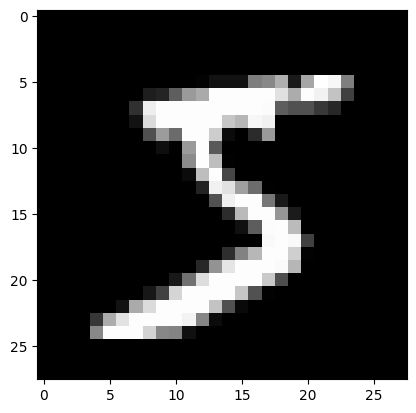

In [ ]:
#MNIST 이미지를 화면으로 불러보기

import sys, os
import numpy as np
import matplotlib.pyplot as plt #책에 나와있는 PIL이 아닌 matplotlib을 씁니다!
sys.path.append('/content/drive/MyDrive/deep-learning-from-scratch/dataset')
from mnist import load_mnist

def img_show(img):
    plt.imshow(img, cmap='gray')
    plt.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0] #x_train의 0번째 데이터 확인
label = t_train[0] #t_train의 0번째 데이터 확인
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)

In [ ]:
# 3.6.2 신경망의 추론 처리

import pickle
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False) #normalize=True처럼 데이터를 특정 범위로 변환하는 처리를 정규화라고 함.
    return x_test, t_test


def init_network():
    with open("/content/drive/MyDrive/deep-learning-from-scratch/ch03/sample_weight.pkl", 'rb') as f:#ch3에 있는 sample_weight.pkl 다운받기! #이미 매개변수를 세팅해 놓음
        network = pickle.load(f)

    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [ ]:
# 정확도 평가!

x, t = get_data()
network = init_network()

accuracy_cnt = 0

for i in range(len(x)): #len(x) = 10000
    y = predict(network, x[i])
    p = np.argmax(y) # np.argmax(y): 확률이 가장 높은 원소의 '인덱스'를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [ ]:
# 3.6.3 배치 처리

# 신경망 각 층의 배열 형상의 추이

x, t = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100 # 배치 크기
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) #axis=1이란 가로 방향에서 가장 큰 원소의 인덱스 불러오기!
    accuracy_cnt += np.sum(p == t[i:i+batch_size]) # ==연산자 사용해 True/False 구성된 bool 배열 만들고 True가 몇 갠지 np.sum으로 세기!

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

# 배치 처리한다면 계산 속도 훨씬 빠른 걸 확인할 수 있죠?

Accuracy:0.9352
